<a href="https://colab.research.google.com/github/AyushiKashyapp/KnowledgeGraphs/blob/main/KG_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Knowledge Graph Creation and Analysis

Using opendiagkg_triples.txt file. Each line of the file contains the (subject, predicate, object) separated by "/t".

In [2]:
!wget https://github.com/facebookresearch/opendialkg/raw/main/data/opendialkg_triples.txt

--2024-06-10 19:47:12--  https://github.com/facebookresearch/opendialkg/raw/main/data/opendialkg_triples.txt
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/facebookresearch/opendialkg/main/data/opendialkg_triples.txt [following]
--2024-06-10 19:47:12--  https://raw.githubusercontent.com/facebookresearch/opendialkg/main/data/opendialkg_triples.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50762312 (48M) [text/plain]
Saving to: ‘opendialkg_triples.txt’

opendialkg_triples. 100%[===================>]  48.41M   276MB/s    in 0.2s    

2024-06-10 19:47:14 (276 MB/s) - ‘opendialkg_triples.txt’ 

**Knowledge Graph construction**

In [4]:
import networkx as nx

import networkx as nx

G = nx.DiGraph()

edges = []
edge_predicates = []
for line in open("opendialkg_triples.txt", "r"):
  line = line[:-1].split("\t")
  subject, predicate, object = line[0], line[1], line[2]
  edges.append((subject, object))
  edge_predicates.append(predicate)

G.add_edges_from(edges)

In [5]:
print(len(edges))
print(len(set(edges)))
print(len(edge_predicates))

1190658
1093796
1190658


Adding the predicate information to the edges in G.

In [6]:
def AddPredicatesToEdges(G, edge_predicates, edges):
  i = 0
  G1 = nx.DiGraph()
  for(subject, object) in edges:
    G1.add_edge(subject, object, predicate = edge_predicates[i])
    i+=1
  return G1

G = AddPredicatesToEdges(G, edge_predicates, edges)

In [7]:
print(list(G.edges())[:10])
print(list(G.edges(data=True))[:10])
print(len(G.edges())==len(G.edges()))

[('September 11 attacks', 'The Pentagon'), ('September 11 attacks', 'Shanksville'), ('September 11 attacks', 'Arlington County'), ('September 11 attacks', 'Manhattan'), ('September 11 attacks', 'New York City'), ('September 11 attacks', 'United 93'), ('September 11 attacks', 'Reign Over Me'), ('September 11 attacks', 'Loose Change'), ('September 11 attacks', 'Falling Man'), ('September 11 attacks', "The Emperor's Children")]
[('September 11 attacks', 'The Pentagon', {'predicate': '~Damaged by disaster'}), ('September 11 attacks', 'Shanksville', {'predicate': 'Location(s)'}), ('September 11 attacks', 'Arlington County', {'predicate': 'Location(s)'}), ('September 11 attacks', 'Manhattan', {'predicate': 'Location(s)'}), ('September 11 attacks', 'New York City', {'predicate': 'Location(s)'}), ('September 11 attacks', 'United 93', {'predicate': '~Subject'}), ('September 11 attacks', 'Reign Over Me', {'predicate': '~Subject'}), ('September 11 attacks', 'Loose Change', {'predicate': '~Subject

1. **Plot the distribution of the number of outgoing edges of a node.**

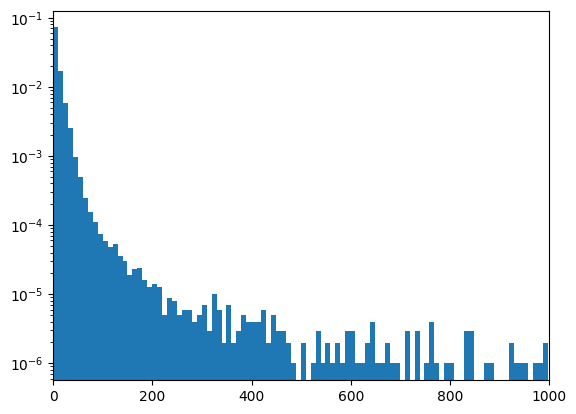

In [8]:
import matplotlib.pyplot as plt

def PlotOutgoingEdgesDistribution(G):
  numberOfOutGoingEdges = [len(G.out_edges(n)) for n in G.nodes() if len(G.out_edges(n)) < 1000]
  plt.hist(numberOfOutGoingEdges, density=True, bins=100)
  plt.xlim(0, 1000)
  plt.yscale("log")
  plt.show()
  return None

PlotOutgoingEdgesDistribution(G)


2. **Plot the distribution of the number of incoming edges of a node.**

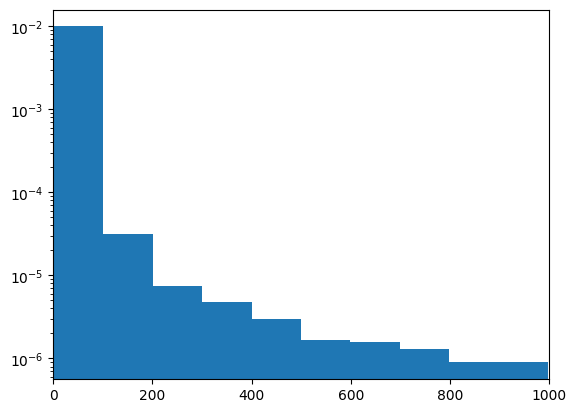

In [9]:
def PlotIncomingEdgesDistribution(G):
  numberOfInComingEdges = [(G.in_degree(n)) for n in G.nodes() if (G.in_degree(n)) < 1000]
  plt.hist(numberOfInComingEdges, density=True, bins=10)
  plt.xlim(0, 1000)
  plt.yscale("log")
  plt.show()
  return None

PlotIncomingEdgesDistribution(G)


3. **Find the top - 10 nodes with the highest number of incoming and outgoing edges.**

In [10]:
def TopKOutdegree(G, k=10):
  degrees = [(n, G.out_degree(n)) for n in G.nodes()]
  degrees.sort(key = lambda n: -n[1]) #To get the higher out degree first.
  print(degrees[:10])
  pass

TopKOutdegree(G, 10)

[('United States of America', 21075), ('Male', 16656), ('English', 12239), ('English Language', 7856), ('Author', 7838), ('Actor', 7779), ('Writer', 7018), ('Northern Hemisphere', 5276), ('Artist', 5097), ('Female', 4787)]


In [12]:
def TopKIndegree(G, k=10):
  degrees = [(n, G.in_degree(n)) for n in G.nodes()]
  degrees.sort(key = lambda n: -n[1]) #To get the higher in degree first.
  print(degrees[:10])
  pass

TopKIndegree(G, 10)

[('United States of America', 21075), ('Male', 16656), ('English', 12239), ('English Language', 7856), ('Author', 7838), ('Actor', 7779), ('Writer', 7018), ('Northern Hemisphere', 5276), ('Artist', 5097), ('Female', 4787)]


This tells us the dataset in biased towards - American Males English

4. **Run Pagerank algorithm over G and list the top - 10 nodes according to the pagerank scores.**

Apply the PangRank algo, and sort the second element. Top 3 nodes shows bias towards America, English and Male. The numbers are probabilities of reaching this page after a random walk.

In [13]:
from networkx.algorithms.link_analysis.pagerank_alg import pagerank

def ImportantNodesPageRank(G):
  results = pagerank(G)
  results = sorted(results.items(), key = lambda element:element[1], reverse = True)
  print(results[:10])
  pass

ImportantNodesPageRank(G)

[('United States of America', 0.01421924530534081), ('Male', 0.012033172564562033), ('English', 0.011443026606012388), ('Actor', 0.0057868429762385504), ('Author', 0.005731652143598551), ('London', 0.005472895845628791), ('English Language', 0.005375792586266158), ('Writer', 0.005025394448971825), ('Female', 0.003688022003730458), ('Brooklyn', 0.003466844044555641)]


# Graph Embeddings

Building TransE embeddings with PyKEEN (Python Knowledge Embeddings).

In [14]:
%%capture
!pip install pykeen

Running TransE model on a dataset of nations.

In [15]:
from pykeen.pipeline import pipeline
from pykeen.datasets import Nations

pipeline_result = pipeline(

    dataset='Nations',

    model='TransE',

)

ent_embed = pipeline_result.model.entity_representations[0]._embeddings.weight

triples_factory = Nations().training

label_to_id = triples_factory.entity_labeling.label_to_id
id_to_label = triples_factory.entity_labeling.id_to_label

INFO:pykeen.utils:Using opt_einsum
INFO:pykeen.datasets.utils:Caching preprocessed dataset to file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=14, num_relations=55, create_inverse_triples=False, num_triples=1592, path="/usr/local/lib/python3.10/dist-packages/pykeen/datasets/nations/train.txt") to file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.datasets.base:Stored training factory to file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=14, num_relations=55, create_inverse_triples=False, num_triples=201, path="/usr/local/lib/python3.10/dist-packages/pykeen/datasets/nations/test.txt") to file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO:pykeen.datasets.base:Stored testing factory 

Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/201 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds


Find a country that is most similar to India in this dataset according to TransE using different embedding such as TuckER.

In [21]:
from pykeen.pipeline import pipeline
from pykeen.datasets import Nations

pipeline_result = pipeline(

    dataset='Nations',

    model='TuckER',

)

ent_embed_t = pipeline_result.model.entity_representations[0]._embeddings.weight

triples_factory = Nations().training

label_to_id = triples_factory.entity_labeling.label_to_id
id_to_label = triples_factory.entity_labeling.id_to_label

INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Loading from file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO:pykeen.triples.triples_factory:Loading from file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/validation
INFO:pykeen.pipeline.api:Using device: None


Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

INFO:pykeen.training.training_loop:Dropping last (incomplete) batch each epoch (1/6 (16.67%) batches).


Training batches on cpu:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/6 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/6 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/201 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.32s seconds


In [17]:
label_to_id['india']

5

In [18]:
id_to_label

{0: 'brazil',
 1: 'burma',
 2: 'china',
 3: 'cuba',
 4: 'egypt',
 5: 'india',
 6: 'indonesia',
 7: 'israel',
 8: 'jordan',
 9: 'netherlands',
 10: 'poland',
 11: 'uk',
 12: 'usa',
 13: 'ussr'}

In [19]:
from scipy.spatial.distance import cosine, euclidean

india = label_to_id['india']
vec_india = ent_embed[india]

for i in range(len(label_to_id)):
  if i != india:
    vec_country = ent_embed[i]

    c = cosine(vec_india.detach().numpy(), vec_country.detach().numpy())
    e = euclidean(vec_india.detach().numpy(), vec_country.detach().numpy())

    print(id_to_label[i], c, e)

brazil 1.0323775596916676 2.0160369873046875
burma 1.0011818128405139 1.978472113609314
china 1.0557031780481339 2.048906087875366
cuba 0.9736921582370996 1.9616061449050903
egypt 0.9861771268770099 1.9824308156967163
indonesia 1.0709385052323341 2.023937702178955
israel 1.0036706835962832 1.8971343040466309
jordan 1.0667089000344276 2.023953676223755
netherlands 1.0469182953238487 2.0120363235473633
poland 1.0535241700708866 1.9972504377365112
uk 0.8219762295484543 1.7685036659240723
usa 1.0353845804929733 1.9719393253326416
ussr 1.0828824043273926 1.9725730419158936


Tucker Embedding

In [22]:
from scipy.spatial.distance import cosine, euclidean

india = label_to_id['india']

vec_india = ent_embed_t[india]

for i in range(len(label_to_id)):
  if i != india:
    vec_country = ent_embed_t[i]

    c = cosine(vec_india.detach().numpy(), vec_country.detach().numpy())
    e = euclidean(vec_india.detach().numpy(), vec_country.detach().numpy())

    print(id_to_label[i], c, e)


brazil 1.048522550612688 2.040414810180664
burma 1.0145882833749056 1.9855432510375977
china 0.9117786288261414 1.9625366926193237
cuba 0.9636600874364376 1.8934606313705444
egypt 1.0296033956110477 1.9901114702224731
indonesia 0.8729126155376434 1.8987559080123901
israel 0.9191785231232643 1.8788498640060425
jordan 0.8267556428909302 1.8993291854858398
netherlands 1.0187165793031454 2.0230631828308105
poland 1.0787572711706161 2.0507264137268066
uk 1.1211291626095772 2.0505425930023193
usa 0.856303483247757 1.8570984601974487
ussr 1.1386839151382446 2.211444139480591
